# Plotting with GeoPandas

In [1]:
import geopandas as gpd

# Load world dataset
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

west_africa = [
    "Benin", "Burkina Faso", "Cabo Verde", "Côte d'Ivoire", "Gambia", "Ghana",
    "Guinea", "Guinea-Bissau", "Liberia", "Mali", "Mauritania", "Niger",
    "Nigeria", "Senegal", "Sierra Leone", "Togo"
]

# Filter for West African Countries
wa_gdf = gdf[gdf["name"].isin(west_africa)]

# Convert to a Mercator CRS for better visualization
wa_gdf = wa_gdf.to_crs(epsg=3857)

## Basic Plotting

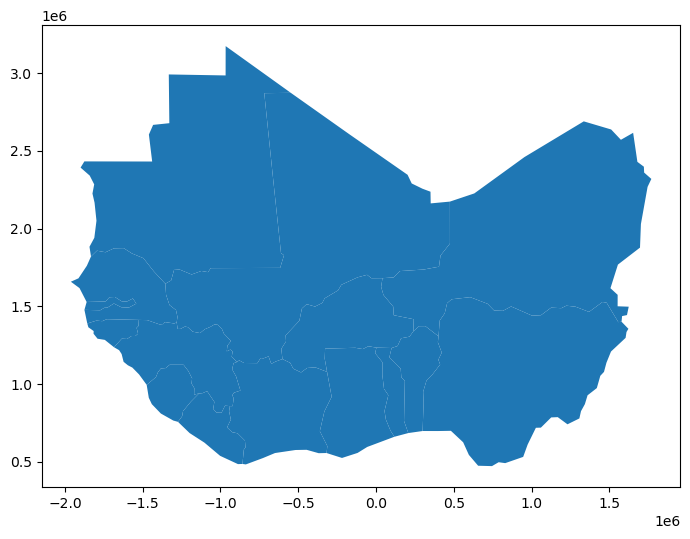

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
wa_gdf.plot(ax=ax)
plt.show()

## Customizing Colors and Styles

### Custom Colors

<Axes: >

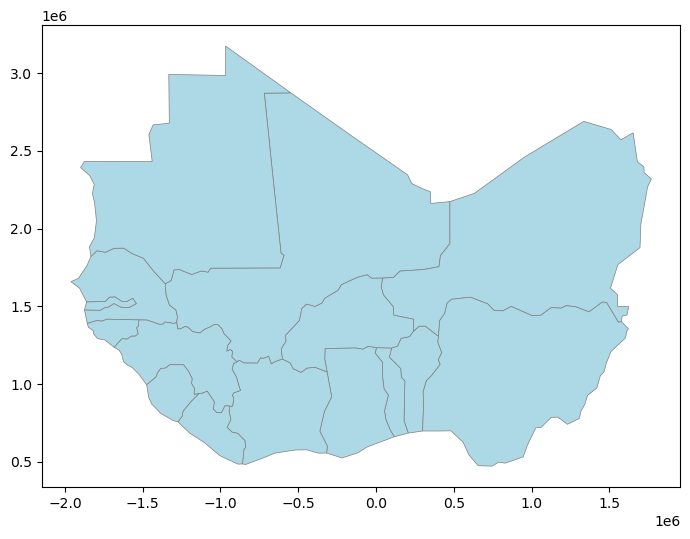

In [3]:
wa_gdf.plot(color="lightblue", edgecolor="gray", linewidth=0.5, figsize=(10, 6))

### Coloring by Attribute

<Axes: >

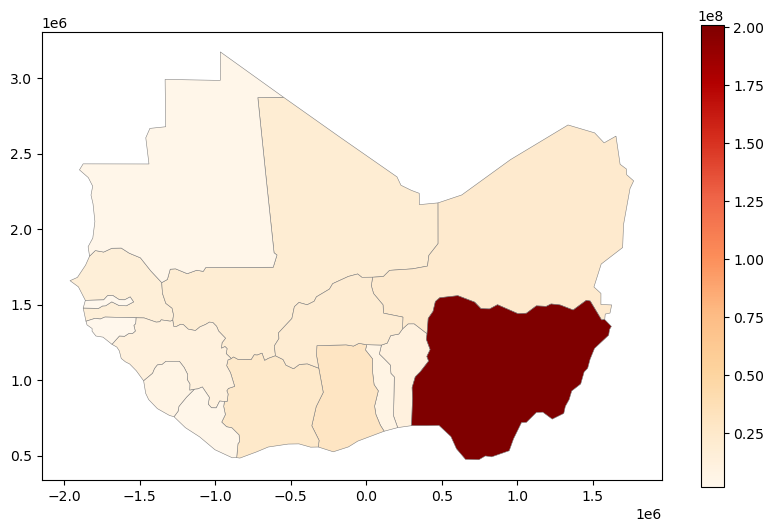

In [4]:
wa_gdf.plot(
    figsize=(10, 6), column="pop_est", 
    cmap="OrRd", edgecolor="gray", 
    linewidth=0.4,
    legend=True
    )

# Adding a grid

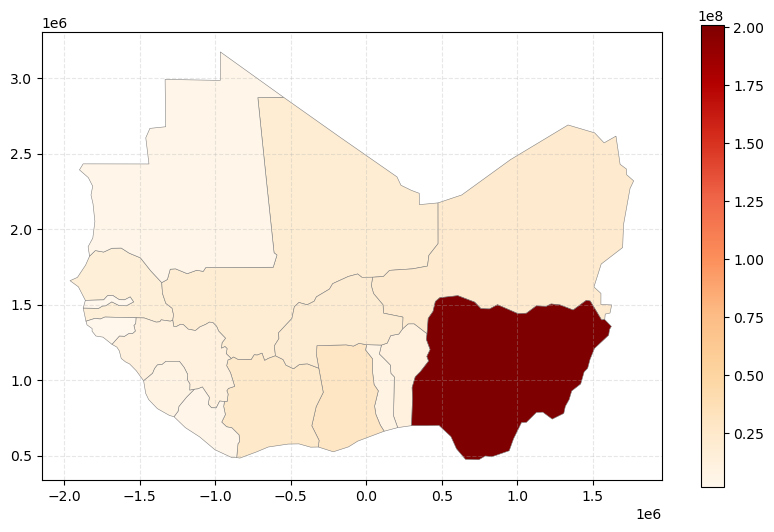

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
wa_gdf.plot(
    ax=ax,
    figsize=(10, 6), column="pop_est", 
    cmap="OrRd", edgecolor="gray", 
    linewidth=0.4,
    legend=True
)

# Customizing the grid intervals
ax.set_xticks(range(int(-2e6), int(2e6), int(5e5)))
ax.set_yticks(range(int(5e5), int(3.5e6), int(5e5)))

# Adding the grid
ax.grid(True, linestyle='--', alpha=0.3)

plt.show()

# Adding a Legend

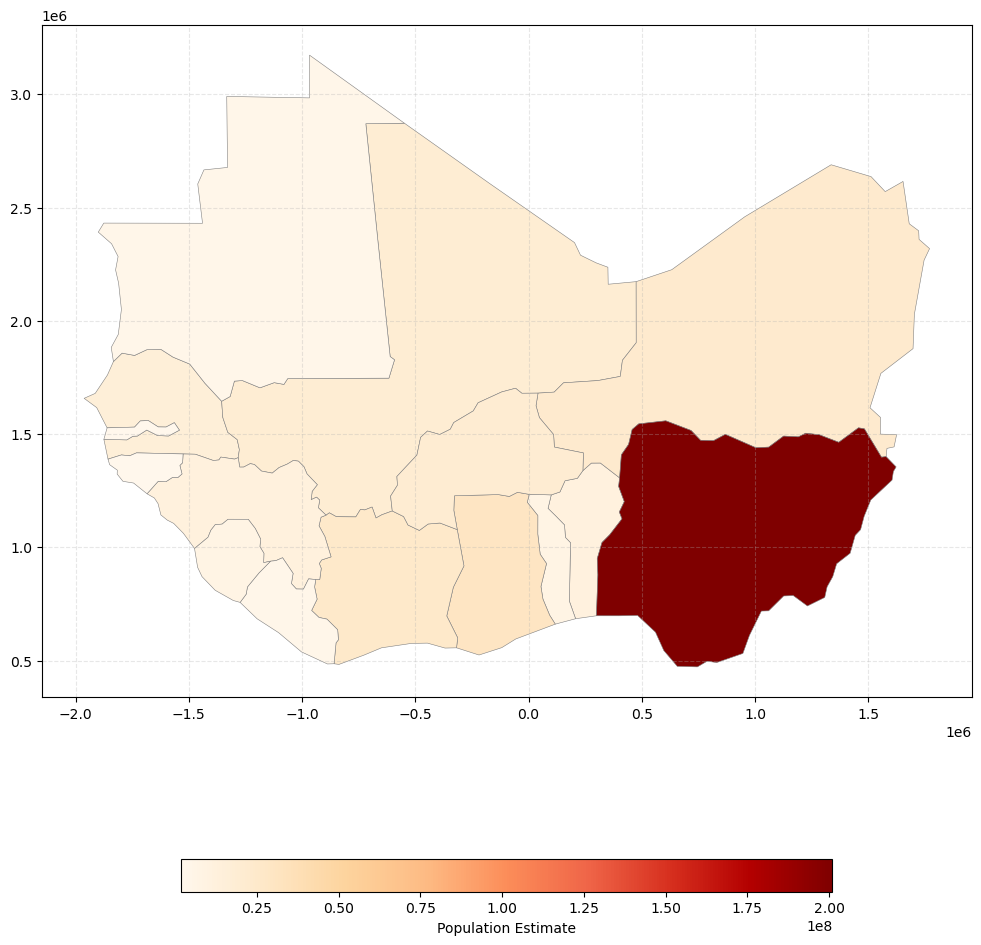

In [6]:
fig, ax = plt.subplots(figsize=(12, 14))
wa_plot = wa_gdf.plot(
    ax=ax,
    figsize=(10, 6), column="pop_est", 
    cmap="OrRd", edgecolor="gray", 
    linewidth=0.4,
    legend=True,
    legend_kwds={
        'label': "Population Estimate",
        'orientation': "horizontal",
        'shrink': 0.7,
    }
)

# Customizing the grid intervals
ax.set_xticks(range(int(-2e6), int(2e6), int(5e5)))
ax.set_yticks(range(int(5e5), int(3.5e6), int(5e5)))

# Adding the grid
ax.grid(True, linestyle='--', alpha=0.3)

plt.show()

# Adding a Scalebar

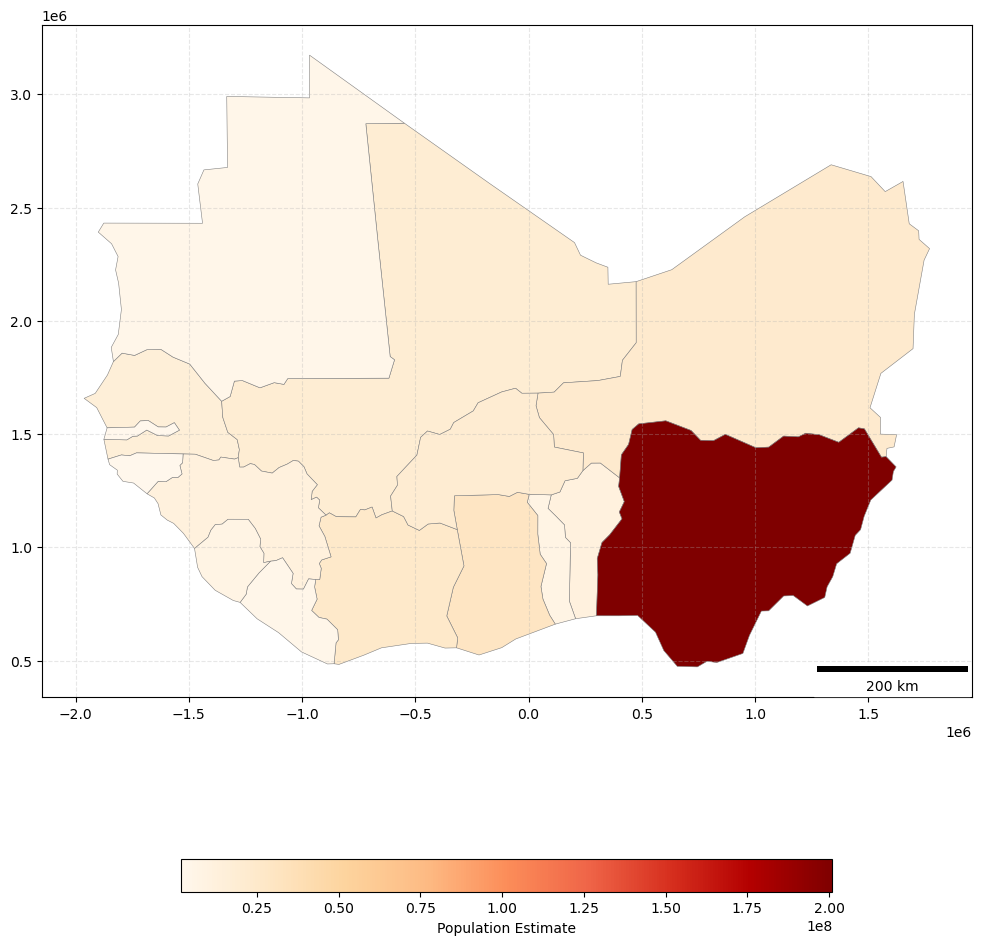

In [7]:
from matplotlib_scalebar.scalebar import ScaleBar

fig, ax = plt.subplots(figsize=(12, 14))
wa_plot = wa_gdf.plot(
    ax=ax,
    figsize=(10, 6), column="pop_est", 
    cmap="OrRd", edgecolor="gray", 
    linewidth=0.4,
    legend=True,
    legend_kwds={
        'label': "Population Estimate",
        'orientation': "horizontal",
        'shrink': 0.7,
    }
)

# Customizing the grid intervals
ax.set_xticks(range(int(-2e6), int(2e6), int(5e5)))
ax.set_yticks(range(int(5e5), int(3.5e6), int(5e5)))

# Adding the grid
ax.grid(True, linestyle='--', alpha=0.3)

# Scalebar
scalebar = ScaleBar(0.3, location="lower right")
ax.add_artist(scalebar)

plt.show()

# Adding a North Arrow
### Image Source: [Compass icons created by graphicmall - Flaticon](https://www.flaticon.com/free-icons/compass)

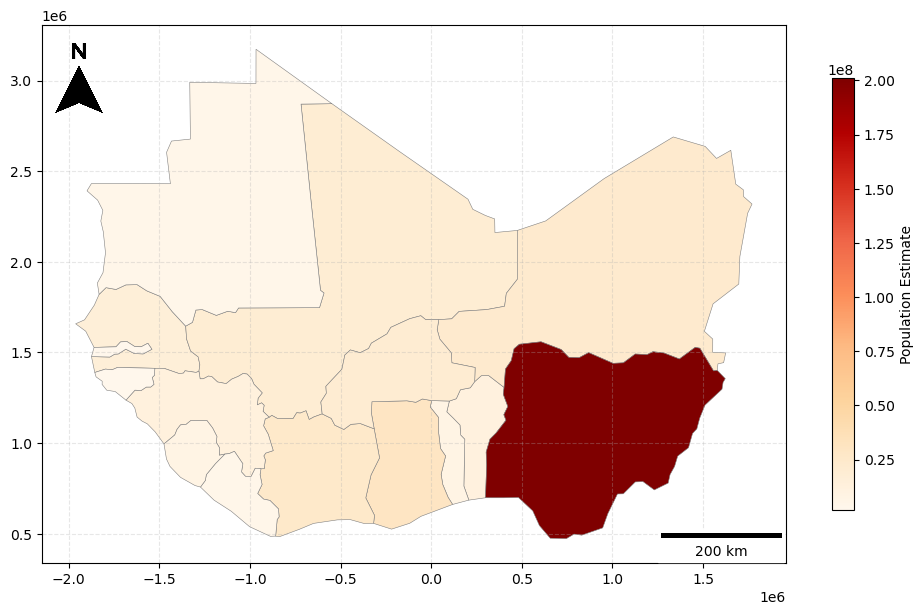

In [8]:
import os
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib_scalebar.scalebar import ScaleBar


fig, ax = plt.subplots(figsize=(12, 14))
wa_plot = wa_gdf.plot(
    ax=ax,
    figsize=(10, 6), column="pop_est", 
    cmap="OrRd", edgecolor="gray", 
    linewidth=0.4,
    legend=True,
    legend_kwds={
        'label': "Population Estimate",
        'shrink': 0.4,
    }
)

# Customizing the grid intervals
ax.set_xticks(range(int(-2e6), int(2e6), int(5e5)))
ax.set_yticks(range(int(5e5), int(3.5e6), int(5e5)))

# Adding the grid
ax.grid(True, linestyle='--', alpha=0.3)

# Scalebar
scalebar = ScaleBar(0.3, location="lower right")
ax.add_artist(scalebar)

# Convert north arrow image to an OffsetImagenorth_arrow_image = os.path.join(os.getcwd(), "data", "03_data", "arrow.png")
north_arrow_image = os.path.join(os.getcwd(), "data", "03_data", "arrow.png")
north_arrow = mpimg.imread(north_arrow_image)
image = OffsetImage(north_arrow, zoom=0.1)

# Use annotation box to position the image
ab = AnnotationBbox(image, xy=(0.05, 0.9), frameon=False, xycoords='axes fraction')

# Add north arrow to the plot
ax.add_artist(ab)

plt.show()

# Insert text on the map

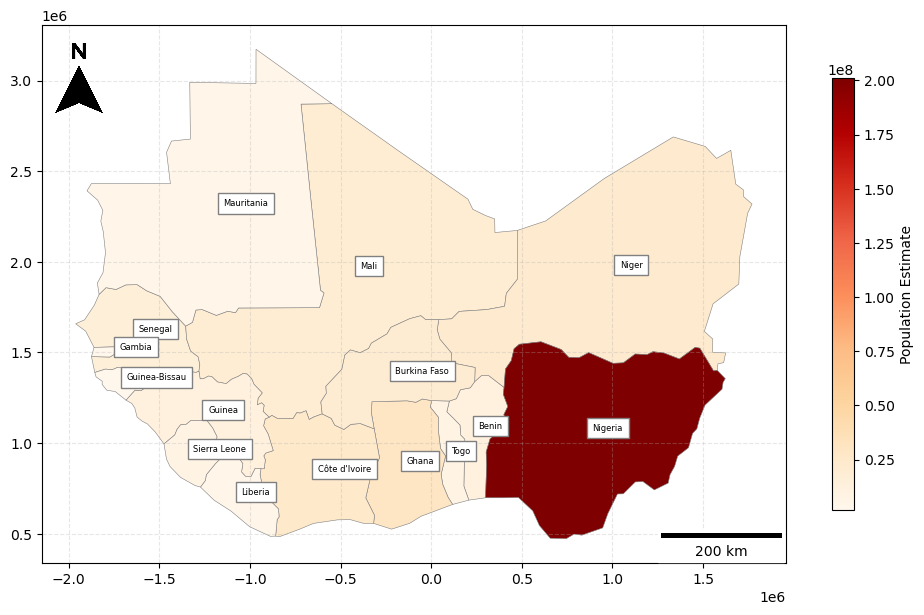

In [9]:
import os
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib_scalebar.scalebar import ScaleBar


fig, ax = plt.subplots(figsize=(12, 14))
wa_plot = wa_gdf.plot(
    ax=ax,
    figsize=(10, 6), column="pop_est", 
    cmap="OrRd", edgecolor="gray", 
    linewidth=0.4,
    legend=True,
    legend_kwds={
        'label': "Population Estimate",
        'shrink': 0.4,
    }
)

# Customizing the grid intervals
ax.set_xticks(range(int(-2e6), int(2e6), int(5e5)))
ax.set_yticks(range(int(5e5), int(3.5e6), int(5e5)))

# Adding the grid
ax.grid(True, linestyle='--', alpha=0.3)

# Scalebar
scalebar = ScaleBar(0.3, location="lower right")
ax.add_artist(scalebar)

# Convert north arrow image to an OffsetImagenorth_arrow_image = os.path.join(os.getcwd(), "data", "03_data", "arrow.png")
north_arrow_image = os.path.join(os.getcwd(), "data", "03_data", "arrow.png")
north_arrow = mpimg.imread(north_arrow_image)
image = OffsetImage(north_arrow, zoom=0.1)

# Use annotation box to position the image
ab = AnnotationBbox(image, xy=(0.05, 0.9), frameon=False, xycoords='axes fraction')

# Add north arrow to the plot
ax.add_artist(ab)

# Adding text: country names
for idx, row in wa_gdf.iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    ax.text(
        x=x, y=y, 
        s=row["name"],
        # rotation=60,
        fontsize=6,
        bbox={
            "facecolor": "white",
            "edgecolor": "gray"
        }
        )

plt.show()

# Multiple Maps on a single figure

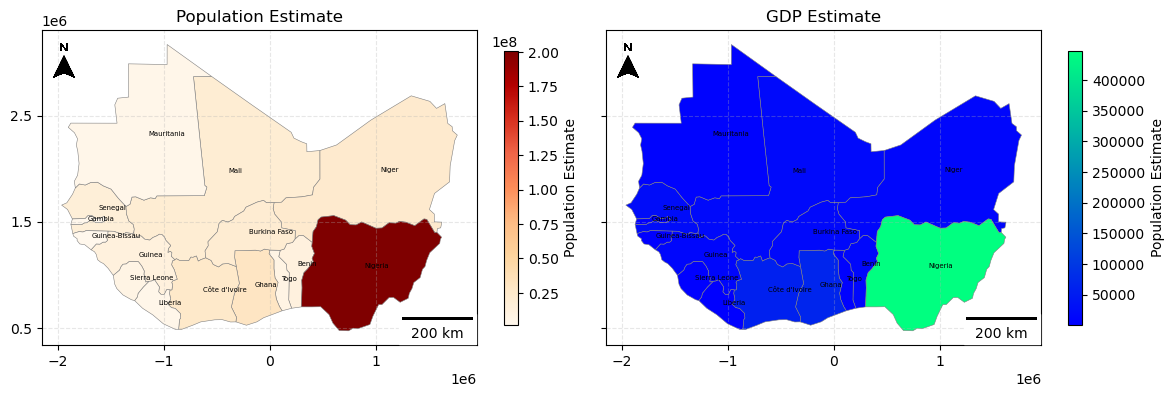

In [10]:
import os
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib_scalebar.scalebar import ScaleBar


fig, ax = plt.subplots(1, 2, figsize=(12, 14), sharex=True, sharey=True)
# First Plot
wa_plot_pop_est = wa_gdf.plot(
    ax=ax[0],
    figsize=(10, 6), column="pop_est", 
    cmap="OrRd", edgecolor="gray", 
    linewidth=0.4,
    legend=True,
    legend_kwds={
        'label': "Population Estimate",
        'shrink': 0.2,
    }
)


# Second Plot
wa_plot_gdp_est = wa_gdf.plot(
    ax=ax[1],
    figsize=(10, 6), column="gdp_md_est", 
    cmap="winter", edgecolor="gray", 
    linewidth=0.4,
    legend=True,
    legend_kwds={
        'label': "Population Estimate",
        'shrink': 0.2,
    }
)


# Customizing the grid intervals
ax[0].set_xticks(range(int(-2e6), int(2e6), int(10e5)))
ax[0].set_yticks(range(int(5e5), int(3.5e6), int(10e5)))
ax[1].set_xticks(range(int(-2e6), int(2e6), int(10e5)))
ax[1].set_yticks(range(int(5e5), int(3.5e6), int(10e5)))

# Adding the grid
ax[0].grid(True, linestyle='--', alpha=0.3)
ax[1].grid(True, linestyle='--', alpha=0.3)

# Scalebar
scalebar = ScaleBar(0.3, location="lower right")
scalebar2 = ScaleBar(0.3, location="lower right")
ax[0].add_artist(scalebar)
ax[1].add_artist(scalebar2)

# Convert north arrow image to an OffsetImagenorth_arrow_image = os.path.join(os.getcwd(), "data", "03_data", "arrow.png")
north_arrow_image = os.path.join(os.getcwd(), "data", "03_data", "arrow.png")
north_arrow = mpimg.imread(north_arrow_image)
image = OffsetImage(north_arrow, zoom=0.05)

# Use annotation box to position the image
ab = AnnotationBbox(image, xy=(0.05, 0.9), frameon=False, xycoords='axes fraction')
ab2 = AnnotationBbox(image, xy=(0.05, 0.9), frameon=False, xycoords='axes fraction')

# Add north arrow to the plot
ax[0].add_artist(ab)
ax[1].add_artist(ab2)

# Adding text: country names
for idx, row in wa_gdf.iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    ax[0].text(
        x=x, y=y, 
        s=row["name"],
        # rotation=60,
        fontsize=5,
        )
    ax[1].text(
        x=x, y=y, 
        s=row["name"],
        # rotation=60,
        fontsize=5,
        )
    
# Set plot 1 title
ax[0].set_title("Population Estimate")
ax[1].set_title("GDP Estimate")

plt.tight_layout()
plt.show()

# Overlaying Multiple Layers

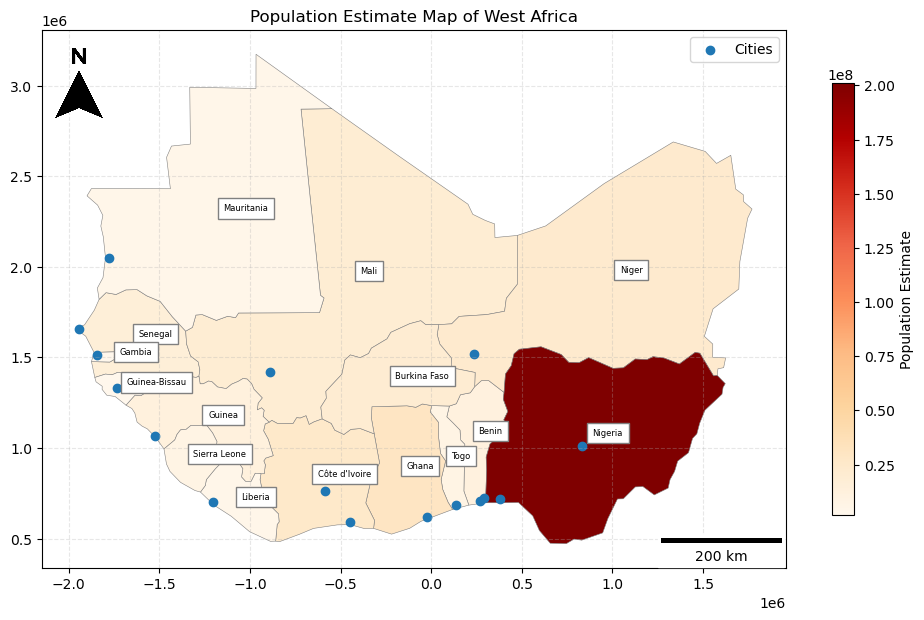

In [11]:
import os
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib_scalebar.scalebar import ScaleBar


fig, ax = plt.subplots(figsize=(12, 14))
wa_plot = wa_gdf.plot(
    ax=ax,
    figsize=(10, 6), column="pop_est", 
    cmap="OrRd", edgecolor="gray", 
    linewidth=0.4,
    legend=True,
    legend_kwds={
        'label': "Population Estimate",
        'shrink': 0.4,
    }
)

# Adding the cities layer
cities_path = gpd.datasets.get_path("naturalearth_cities")
cities = gpd.read_file(cities_path).to_crs(epsg=3857)

wa_cities = cities.clip(wa_gdf)
cities_plot = wa_cities.plot(ax=wa_plot, label="Cities")

ax.legend(["Cities"])
# Customizing the grid intervals
ax.set_xticks(range(int(-2e6), int(2e6), int(5e5)))
ax.set_yticks(range(int(5e5), int(3.5e6), int(5e5)))

# Adding the grid
ax.grid(True, linestyle='--', alpha=0.3)

# Scalebar
scalebar = ScaleBar(0.3, location="lower right")
ax.add_artist(scalebar)

# Convert north arrow image to an OffsetImagenorth_arrow_image = os.path.join(os.getcwd(), "data", "03_data", "arrow.png")
north_arrow_image = os.path.join(os.getcwd(), "data", "03_data", "arrow.png")
north_arrow = mpimg.imread(north_arrow_image)
image = OffsetImage(north_arrow, zoom=0.1)

# Use annotation box to position the image
ab = AnnotationBbox(image, xy=(0.05, 0.9), frameon=False, xycoords='axes fraction')

# Add north arrow to the plot
ax.add_artist(ab)

# Adding text: country names
for idx, row in wa_gdf.iterrows():
    x = row.geometry.centroid.x
    y = row.geometry.centroid.y
    ax.text(
        x=x, y=y, 
        s=row["name"],
        # rotation=60,
        fontsize=6,
        bbox={
            "facecolor": "white",
            "edgecolor": "gray"
        }
        )


# Add title
ax.set_title("Population Estimate Map of West Africa")


# Saving the map
export_path = os.path.join(os.getcwd(), "output", "03_output", "wa_map.png")
plt.savefig(export_path, dpi=300, bbox_inches="tight")

plt.show()